In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 50% !important; height: 50% !important;} </style>" 

In [2]:
StudentsPerformance_original = pd.read_csv('C:\\programmer_shit\\data_salo_files\\StudentsPerformance.csv')
StudentsPerformance_original

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
StudentsPerformance_original[["gender" , "math score", "reading score", "writing score"]].groupby("gender").mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [4]:
StudentsPerformance = pd.get_dummies(StudentsPerformance_original)
StudentsPerformance



,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,62,55,55,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,59,71,65,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,68,78,77,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


In [5]:
X = StudentsPerformance.drop(["gender_female" , "math score" , "lunch_standard" , "test preparation course_none" ] , axis = 1)
y = StudentsPerformance["math score"]

In [6]:
 X.corr()

,reading score,writing score,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,test preparation course_completed
reading score,1.000000,0.954598,-0.244313,-0.096274,-0.060283,-0.003074,0.035177,0.106712,0.064386,0.096024,-0.151068,0.106452,0.010782,-0.071369,-0.229560,0.241780
writing score,0.954598,1.000000,-0.301225,-0.110714,-0.078254,-0.010203,0.082032,0.089077,0.064799,0.128297,-0.182211,0.125693,0.027989,-0.097326,-0.245769,0.312946
gender_male,-0.244313,-0.301225,1.000000,0.071001,-0.028466,-0.063368,0.030566,0.020302,-0.004835,-0.011638,0.037952,-0.046188,-0.004460,0.008990,-0.021372,0.006028
race/ethnicity_group A,-0.096274,-0.110714,0.071001,1.000000,-0.151381,-0.213923,-0.186234,-0.126110,-0.048658,0.016307,0.004919,-0.033551,-0.017751,0.073921,0.032329,-0.006315
race/ethnicity_group B,-0.060283,-0.078254,-0.028466,-0.151381,1.000000,-0.331479,-0.288574,-0.195411,-0.007238,-0.019121,0.069093,-0.056363,-0.036203,0.026531,0.008257,-0.000106
race/ethnicity_group C,-0.003074,-0.010203,-0.063368,-0.213923,-0.331479,1.000000,-0.407797,-0.276145,0.037077,0.015682,0.007977,0.001630,-0.015872,-0.045339,0.003385,0.012522
race/ethnicity_group D,0.035177,0.082032,0.030566,-0.186234,-0.288574,-0.407797,1.000000,-0.240402,-0.044674,-0.020556,-0.042118,0.072793,0.042347,0.018402,0.009458,-0.055956
race/ethnicity_group E,0.106712,0.089077,0.020302,-0.126110,-0.195411,-0.276145,-0.240402,1.000000,0.054922,0.013221,-0.039494,-0.003180,0.023153,-0.053075,-0.052398,0.059393
parental level of education_associate's degree,0.064386,0.064799,-0.004835,-0.048658,-0.007238,0.037077,-0.044674,0.054922,1.000000,-0.195386,-0.263746,-0.133757,-0.288649,-0.249426,-0.009102,0.012668
parental level of education_bachelor's degree,0.096024,0.128297,-0.011638,0.016307,-0.019121,0.015682,-0.020556,0.013221,-0.195386,1.000000,-0.180595,-0.091588,-0.197647,-0.170790,0.013668,0.024285


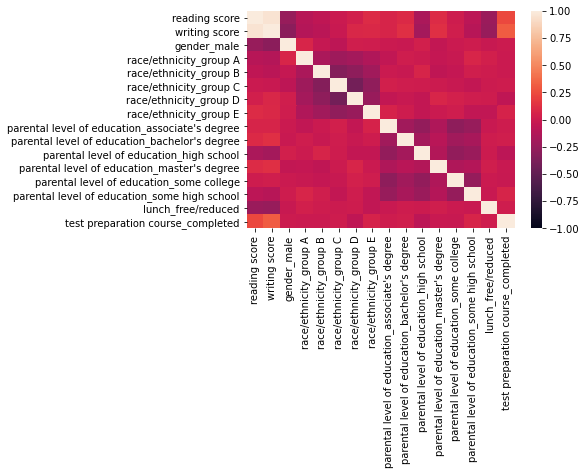

In [63]:
corr_matrix = X.corr()
sns.heatmap(corr_matrix , vmin=-1, vmax=1);
# reading is correling with writing
X = X.drop(["writing score"] , axis = 1)

In [64]:
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()
norm.fit(X)
X_norm = norm.transform(X)
X_norm

array([[ 0.19399858, -0.96462528, -0.31256174, ..., -0.4669334 ,
        -0.74188112, -0.74674788],
       [ 1.42747598, -0.96462528, -0.31256174, ..., -0.4669334 ,
        -0.74188112,  1.33914006],
       [ 1.77010859, -0.96462528, -0.31256174, ..., -0.4669334 ,
        -0.74188112, -0.74674788],
       ...,
       [ 0.12547206, -0.96462528, -0.31256174, ..., -0.4669334 ,
         1.34792485,  1.33914006],
       [ 0.60515772, -0.96462528, -0.31256174, ..., -0.4669334 ,
        -0.74188112,  1.33914006],
       [ 1.15336989, -0.96462528, -0.31256174, ..., -0.4669334 ,
         1.34792485, -0.74674788]])

In [75]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 24)


regr = LinearRegression()
model = regr.fit(X_train, y_train)
predicted = regr.predict(X_test)

predicted


array([ 39.73602691,  63.16262794,  88.91191039,  71.51474654,
        61.13174425,  50.84408489,  78.14597457,  83.21200396,
        23.24902948,  69.69387067,  85.18084595,  80.94257167,
        95.37787829,  84.32955606,  52.1133462 ,  63.58775492,
        81.25751726,  62.45673493,  72.61780068,  67.8235599 ,
        66.91832602,  92.75231243,  26.92260731,  65.61293867,
        70.97612558,  86.19313929,  88.31915281,  57.86688954,
        90.98410599,  70.94853559,  58.58148733,  72.16319205,
        78.98435223,  86.33288267,  30.22197535,  50.97076891,
        69.79561064,  66.44903586,  72.47117983,  84.30909233,
        41.48357864,  69.25207374,  43.79232692,  59.93030369,
        49.01595961,  86.36926975,  90.81098314,  78.62270178,
        67.39027442,  79.97562601,  50.01601364,  74.1721149 ,
        67.76941957,  77.21673889,  72.32045526,  51.25831696,
        62.68275225,  60.31706883,  76.0946476 ,  66.03694336,
        51.45924084,  44.02887369,  71.40443068,  52.54

In [76]:
model.score(X_train, y_train)
model.score(X_test, y_test)

0.8710887044592127

In [77]:
coefs = model.coef_


coefs_table = pd.DataFrame( coefs, X.columns )

# coefs_table = coefs_table.append("intercept_", model.intercept_)

coefs_table


,0
reading score,0.277122
writing score,0.691811
gender_male,13.112660
race/ethnicity_group A,-1.447718
race/ethnicity_group B,-0.290273
race/ethnicity_group C,-1.221018
race/ethnicity_group D,-0.911212
race/ethnicity_group E,3.870221
parental level of education_associate's degree,0.540786
parental level of education_bachelor's degree,-0.674401


In [30]:

coefs_table = coefs_table.set_axis(['feature'], axis=1, inplace=False)
coefs_table

,feature
reading score,0.300254
writing score,0.674912
gender_male,12.988206
race/ethnicity_group A,-0.893518
race/ethnicity_group B,-0.774895
race/ethnicity_group C,-1.005443
race/ethnicity_group D,-1.163484
race/ethnicity_group E,3.837341
parental level of education_associate's degree,0.353966
parental level of education_bachelor's degree,-0.987726


In [31]:



new_row = pd.Series(data={'feature':model.intercept_}, name='intercept_')
#append row to the dataframe
coefs_table = coefs_table.append(new_row)

coefs_table

,feature
reading score,0.300254
writing score,0.674912
gender_male,12.988206
race/ethnicity_group A,-0.893518
race/ethnicity_group B,-0.774895
race/ethnicity_group C,-1.005443
race/ethnicity_group D,-1.163484
race/ethnicity_group E,3.837341
parental level of education_associate's degree,0.353966
parental level of education_bachelor's degree,-0.987726


In [27]:
StudentsPerformance_original

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [8]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2, random_state = 42)
X_for_Kmeans = StudentsPerformance



In [40]:
model.labels_

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,

In [42]:
X["cluster"] = model.labels_

X.groupby('cluster').mean()

X_for_Kmeans = StudentsPerformance

,reading score,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,test preparation course_completed
cluster,,,,,,,,,,,,,,,
0,80.318182,0.380682,0.062500,0.166667,0.323864,0.276515,0.170455,0.244318,0.138258,0.159091,0.071970,0.227273,0.159091,0.263258,0.452652
1,56.697034,0.595339,0.118644,0.216102,0.313559,0.245763,0.105932,0.197034,0.095339,0.237288,0.044492,0.224576,0.201271,0.457627,0.252119


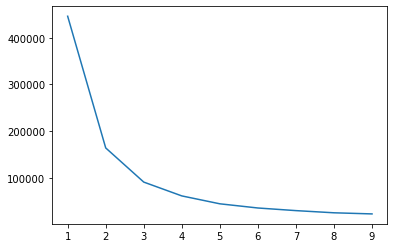

In [10]:
k = range(1,10)
models = [KMeans(n_clusters = i, random_state = 42).fit(X) for i in k]
dist = [m.inertia_ for m in models]

plt.plot(k, dist)


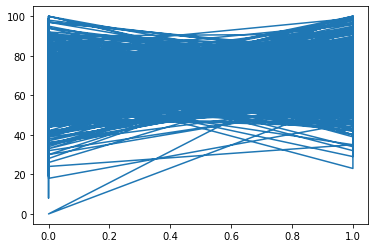

In [57]:

plt.plot( )


In [61]:
StudentsPerformance.groupby("test preparation course_completed")[["reading score" , "math score", "writing score"]].median()

,reading score,math score,writing score
test preparation course_completed,,,
0,67,64,65
1,75,69,76
